# Heart Disease Predictor

- This *new_data* branch is for improving this model.
- I need to know more about this dataset and make my Data Science practices more clear, easy to understand, and more robust.

In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, chi2

#### Life cycle of a Data Science project:
- Data Collection
- EDA
- Data Preprocessing
- Feature Engineering
- Model building and evaluation
- Model deployment

## Data Collection

In [310]:
data = pd.read_csv('./data/heart.csv')

In [178]:
data.shape

(1025, 14)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## EDA

In [180]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


- Check for duplicated data.

In [181]:
data_duplicates = data.duplicated()
data_duplicates.sum()

0

- there are **NO** duplicates in the dataset.

- Check if we have imbalanced dataset

In [182]:
data['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

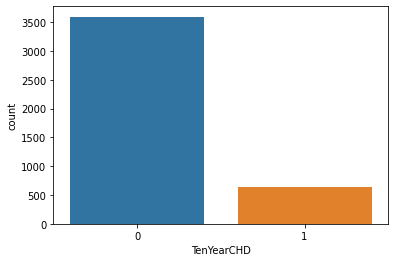

In [183]:
sns.countplot(x=data['TenYearCHD'])

- So, the above dataset is imbalanced. If we train the binary classification without fixing this issue, our model will be completely biased.
- this would also impact our feature correlation.
- So, let's handel this.
- Before balancing the dataset, we need to split it first, because I am going to use SMOTE technique to balanced this dataset in X_train, this SMOTE must not be implemented in the X_test data.
- SMOTE is an algortihm that uses K-nearest neighbours to generate synthetic data from the original data(in this case X_train)

## Split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(data, data['TenYearCHD'], test_size=0.3, random_state=0)

##### Handling imbalanced dataset
    - only on X_train

- Now let's check the shape and balance of the dataset:

- shape of the dataset

In [185]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
264,1,57,1.0,0,0.0,0.0,0,1,0,176.0,134.0,97.0,38.14,68.0,94.0,0
385,1,39,2.0,0,0.0,0.0,0,0,0,235.0,120.0,80.0,27.23,62.0,87.0,0
2564,1,54,2.0,0,0.0,0.0,0,1,0,207.0,146.0,98.0,23.63,65.0,91.0,1
3787,0,49,3.0,0,0.0,0.0,0,0,0,203.0,125.0,70.0,22.52,72.0,NaN,0
4139,0,53,3.0,0,0.0,NaN,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0,0


- visualize balance using sns

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

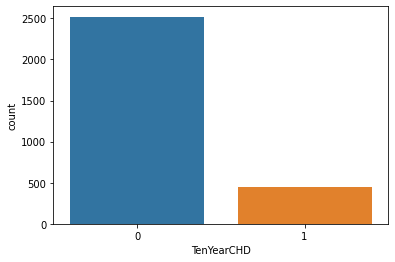

In [186]:
sns.countplot(x=y_train)

- explore train and test data:

In [187]:
print('X_train.shape=', X_train.shape, '\nX_test.shape=', X_test.shape)

X_train.shape= (2966, 16) 
X_test.shape= (1272, 16)


Overview of the following procedure:
1. perform **imputation** on both train & test data seperately.
2. perform **EDA**, **preprocessing**, and **feature engineering** on the train data.
3. perform **preprocessing** on the test data as well, so that it can be a valid information for the model.
4. build model using train data.
5. test it's accuracy using test data: this will be the final accuracy of the model.

In [188]:
X_train.isnull().sum()

male                 0
age                  0
education           72
currentSmoker        0
cigsPerDay          26
BPMeds              39
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             41
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            267
TenYearCHD           0
dtype: int64

In [189]:
X_test.isnull().sum()

male                 0
age                  0
education           33
currentSmoker        0
cigsPerDay           3
BPMeds              14
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              9
sysBP                0
diaBP                0
BMI                  3
heartRate            0
glucose            121
TenYearCHD           0
dtype: int64

- There are some features having null values so, we need to perform imputation in the train dataset.
- why inputation? why not delete the feature itself?
    - because none of the feature contains more than half null values, infact the maximum null values contained is in *glucose* feature which is 441/5031 = 0.087 or *8.7%* approx on train data and 190/2157 = 0.088 or *8.8%* approx on test data.

- visualize the *null values*

<AxesSubplot:>

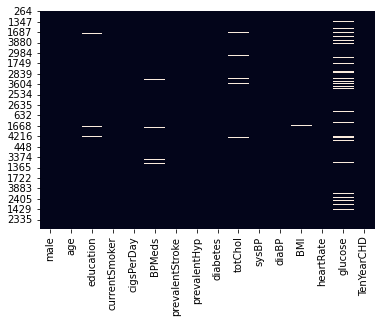

In [190]:
sns.heatmap(X_train.isnull(), cbar=False)

<AxesSubplot:>

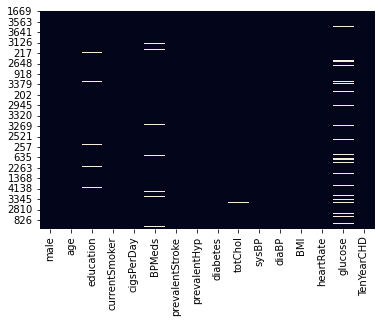

In [191]:
sns.heatmap(X_test.isnull(), cbar=False)

- all unique values of education

In [192]:
X_train['education'].unique()

array([ 1.,  2.,  3.,  4., nan])

- what impact would **education** have on Ten-year-coronary-heart-disease?
- **NO** impact right?
- So, it's just right to drop this feature itself.
- let's drop it.

In [193]:
X_train.drop('education', axis=1, inplace=True)
X_test.drop('education', axis=1, inplace=True)
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
264,1,57,0,0.0,0.0,0,1,0,176.0,134.0,97.0,38.14,68.0,94.0,0
385,1,39,0,0.0,0.0,0,0,0,235.0,120.0,80.0,27.23,62.0,87.0,0
2564,1,54,0,0.0,0.0,0,1,0,207.0,146.0,98.0,23.63,65.0,91.0,1
3787,0,49,0,0.0,0.0,0,0,0,203.0,125.0,70.0,22.52,72.0,NaN,0
4139,0,53,0,0.0,NaN,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0,0


- in order to perform successfull imputation, without much affecting the dataset, we'll have to categorize those features having null values as **categorical/nominal** or **continuous**.
- referring from the description given for the dataset it's visible that:
    - cigsPerDay, totChol, BMI, heartRate, glucose are **continuous** features.
    - BPMeds is a **nominal** feature.
- Handlling missing values:
    1. for nominal feature: replace with the most frequent value.
    2. for continuous features: perform mean/median imputation.

Distribution of **BPMeds** in the train dataset:

<AxesSubplot:xlabel='BPMeds', ylabel='Count'>

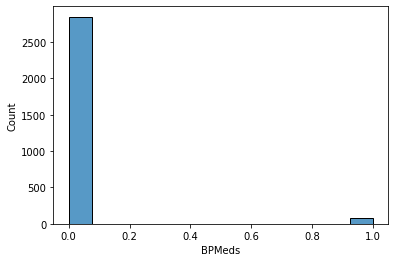

In [194]:
sns.histplot(X_train.BPMeds)

- count unique vals before imputation

In [195]:
print('X_train: \n', X_train['BPMeds'].value_counts(), 'X_test: \n', X_test['BPMeds'].value_counts())

X_train: 
 0.0    2847
1.0      80
Name: BPMeds, dtype: int64 X_test: 
 0.0    1214
1.0      44
Name: BPMeds, dtype: int64


- most frequent value is **0**
- let's impute it's mode.

In [196]:
X_train['BPMeds'].fillna(X_train.iloc[4].mode().item(), inplace=True)
X_test['BPMeds'].fillna(X_test.iloc[4].mode().item(), inplace=True)
print('X_train:', X_train['BPMeds'].isnull().sum(), '\nX_test:', X_test['BPMeds'].isnull().sum())

X_train: 0 
X_test: 0


In [197]:
print('X_train: \n', X_train['BPMeds'].value_counts(), 'X_test: \n', X_test['BPMeds'].value_counts())

X_train: 
 0.0    2886
1.0      80
Name: BPMeds, dtype: int64 X_test: 
 0.0    1228
1.0      44
Name: BPMeds, dtype: int64


- So, the missing values of BPMeds are handlled.
- *Nominal value imputation is complete!*
- Now imputing continuous values!

In [198]:
X_train.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          26
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             41
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            267
TenYearCHD           0
dtype: int64

In [199]:
X_test.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           3
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              9
sysBP                0
diaBP                0
BMI                  3
heartRate            0
glucose            121
TenYearCHD           0
dtype: int64

- filling missing values in **continuous** variables.

In [307]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.transform(X_test))

# imputation removed column names: putting them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

c:\Users\Redocmi\.virtualenvs\heart_disease_predictor-6tIO5ffo\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- TenYearCHD
- cigsPerDay
- currentSmoker
- heartRate
- prevalentStroke

  warnings.warn(message, FutureWarning)


ValueError: X has 10 features, but SimpleImputer is expecting 15 features as input.

<AxesSubplot:>

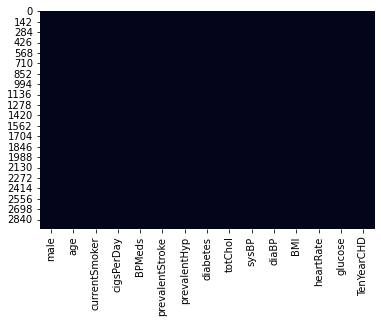

In [201]:
sns.heatmap(imputed_X_train.isnull(), cbar=False)

<AxesSubplot:>

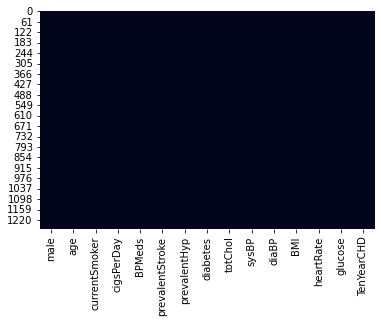

In [202]:
sns.heatmap(imputed_X_test.isnull(), cbar=False)

- Now assign imputed_X_train and imputed_X_test to X_train and X_test respectively.

In [203]:
X_train = imputed_X_train
X_test = imputed_X_test

print('X_train.isnull().sum().sum(): ', X_train.isnull().sum().sum(),
'\nX_test.isnull().sum().sum(): ',X_test.isnull().sum().sum())

X_train.isnull().sum().sum():  0 
X_test.isnull().sum().sum():  0


In [51]:
y_train.value_counts()[0]

2520

### Now apply resample for oversampling to balance the X_train

Random oversampling: 

1.0    2520
0.0    2520
Name: TenYearCHD, dtype: int64


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

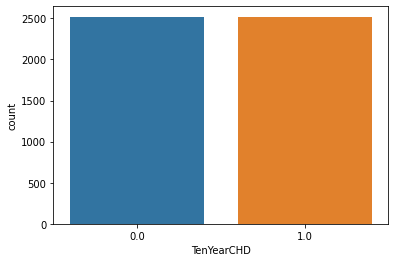

In [210]:
X_train_minority = X_train[X_train['TenYearCHD']==1].sample(y_train.value_counts()[0], replace=True)
X_train_bal = pd.concat([X_train_minority, X_train[X_train['TenYearCHD']==0]])
print('Random oversampling: \n')
print(X_train_bal['TenYearCHD'].value_counts())
sns.countplot(x=X_train_bal['TenYearCHD'])

- Now missing/null values are completely handlled in both X_train and X_test.
- Imbalanced dataset is also balanced.
- Now we are in good shape to proceed with **EDA**.
- From now on I'll only focus on X_train_bal data for any analysis, and buil the model on it.

#### Analysing the relationships between different features

In [211]:
X_train_bal.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2704,1.0,65.0,0.0,0.0,0.0,0.0,1.0,1.0,240.0,235.0,100.0,25.817722,68.0,297.000000,1.0
158,1.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0,118.5,88.0,28.680000,77.0,65.000000,1.0
2265,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,328.0,127.0,70.0,22.360000,75.0,63.000000,1.0
1658,1.0,56.0,1.0,20.0,0.0,0.0,0.0,0.0,340.0,134.0,89.5,21.910000,50.0,72.000000,1.0
1527,1.0,44.0,1.0,15.0,0.0,0.0,1.0,0.0,232.0,141.0,104.0,27.380000,75.0,82.119674,1.0


In [212]:
X_train_bal = X_train_bal.reset_index()

In [213]:
X_train_bal.head()

,index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,2704,1.0,65.0,0.0,0.0,0.0,0.0,1.0,1.0,240.0,235.0,100.0,25.817722,68.0,297.000000,1.0
1,158,1.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0,118.5,88.0,28.680000,77.0,65.000000,1.0
2,2265,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,328.0,127.0,70.0,22.360000,75.0,63.000000,1.0
3,1658,1.0,56.0,1.0,20.0,0.0,0.0,0.0,0.0,340.0,134.0,89.5,21.910000,50.0,72.000000,1.0
4,1527,1.0,44.0,1.0,15.0,0.0,0.0,1.0,0.0,232.0,141.0,104.0,27.380000,75.0,82.119674,1.0


In [214]:
len(X_train_bal['TenYearCHD'])

5040

In [215]:
y_train = X_train_bal['TenYearCHD']
y_train.shape

(5040,)

<AxesSubplot:xlabel='male', ylabel='Count'>

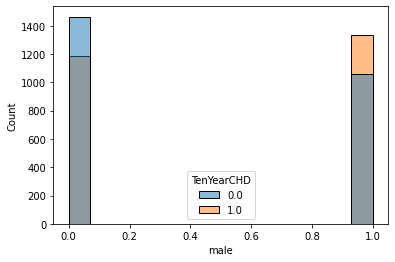

In [216]:
sns.histplot(x=X_train_bal['male'], hue=y_train)

- more ratio of males have TenYearCHD than females

- Distribution of *age* in the entire dataset.

<AxesSubplot:xlabel='age', ylabel='Count'>

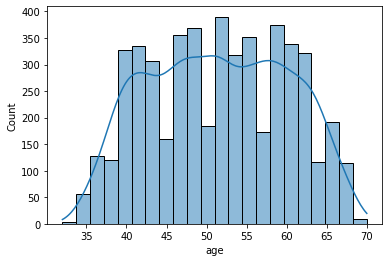

In [217]:
sns.histplot(x=X_train_bal['age'], kde=True)

- There is a uniform distribution in the age feature throughout the dataset.

- Can there be a relation between the fraction of people having 10yearCHD at an age and the age?
- yes, let's see if this relation increases with age or something else.

In [218]:
len(list(X_train_bal['age'].unique()))

39

In [219]:
y_train.shape

(5040,)

In [220]:
# count of heart disease based on age
ages = list(X_train_bal['age'].unique())
y = []
for age in ages:
    count = 0
    count_total = len(X_train_bal[X_train_bal['age']==age])
    for i in range(0, len(X_train_bal)):
        if X_train_bal['age'][i] == age:
            count += list(y_train)[i]
    y.append(count/count_total)

# variable desc:
# count: total no. of people at a particular age having TenYearCHD.
# count_total: total no. of people at a particular age.

In [221]:
X_train_bal.shape

(5040, 16)

In [222]:
X_train_bal['age'].value_counts()

48.0    212
52.0    198
63.0    193
58.0    192
51.0    192
46.0    189
40.0    184
50.0    184
61.0    183
59.0    182
55.0    179
42.0    177
57.0    173
56.0    173
43.0    168
47.0    166
53.0    159
45.0    159
54.0    158
41.0    157
49.0    157
60.0    155
39.0    143
44.0    138
62.0    129
65.0    124
38.0    121
64.0    117
37.0     73
66.0     68
67.0     62
36.0     55
68.0     52
35.0     41
34.0     15
70.0      6
69.0      3
33.0      2
32.0      1
Name: age, dtype: int64

[Text(0.5, 0, 'age'), Text(0, 0.5, 'fraction of CHD patients at an age')]

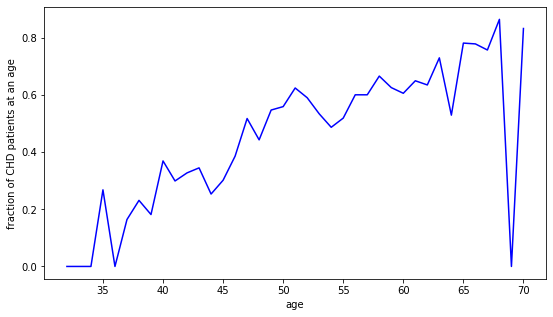

In [223]:
age_plot = plt.figure(figsize=(9,5))
age_plot = sns.lineplot(x=ages, y=y, color='b')
age_plot.set(xlabel='age', ylabel='fraction of CHD patients at an age')

From the above plot it's clear that with age more fraction of people suffer
from the 10yearCHD.
Also, we can say that the more is your age, there is a higher chance of you having 10yearCHD. And, we can also see a sudden downfall in the graph at an age of 68 approx which can be justified by the fact that the number of people present in the dataset with that age is also less, hence the fraction is less, say for example age=70 has only 2 people out of which 1 has TenYearCHD so fraction is 0.5, OR 50% chance of having TenYearCHD.

<AxesSubplot:xlabel='currentSmoker', ylabel='Count'>

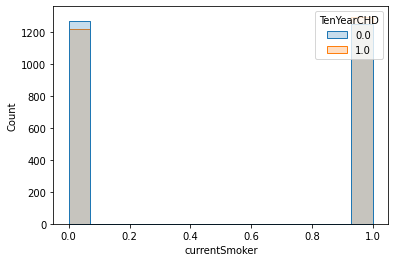

In [224]:
sns.histplot(x=X_train_bal['currentSmoker'], hue=y_train, element='step')

- So, whether or not the person smokes or not they have almost equal chance of having the TenYearCHD.
- So, maybe this feature does not effect our overall prediction of the heart disease.
- Also it might be help full to know that although smoking doesn't matter a/c to the dataset, but the number of ciggerates smoked per day will matter as smoking is one of the direct cause of Coronary Heart disease.

<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

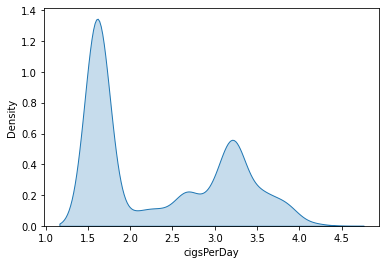

In [225]:
sns.kdeplot(data=np.log(X_train_bal['cigsPerDay']+5), shade=True)

<AxesSubplot:xlabel='cigsPerDay', ylabel='age'>

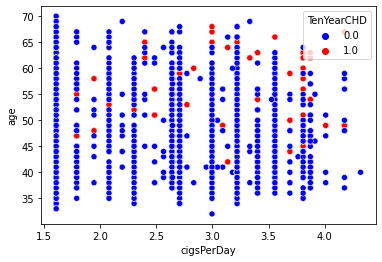

In [226]:
sns.scatterplot(x=np.log(X_train_bal['cigsPerDay']+5), y=X_train_bal['age'], hue=y_train, palette=['b','r'])

#### From the above plot
- the normally distributed data of the *cigsPerDay* feature makes more sense.
- So, we'll update it's value to the one used above: np.log(X_train_bal['cigsPerDay']+5)

<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

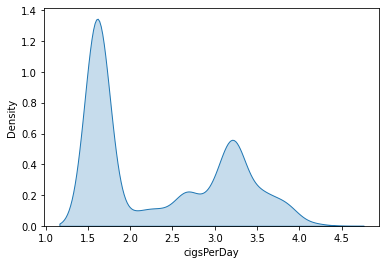

In [227]:
X_train_bal.loc[:,'cigsPerDay'] = np.log(X_train_bal['cigsPerDay']+5)
sns.kdeplot(data=X_train_bal['cigsPerDay'], shade=True)

<AxesSubplot:xlabel='cigsPerDay', ylabel='age'>

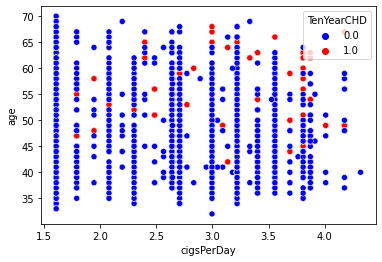

In [228]:
sns.scatterplot(x=X_train_bal['cigsPerDay'], y=X_train_bal['age'], hue=y_train, palette=['b','r'])

- High blood pressure can cause many heart problems, including: Coronary heart disease.
- Let's examine how bpMeds effects the disease.

<AxesSubplot:xlabel='BPMeds', ylabel='Count'>

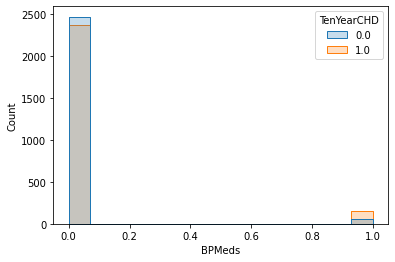

In [229]:
sns.histplot(x=X_train_bal['BPMeds'], hue=y_train, element='step')

- As obvious from the above plot we see that a person having BP medications has a high chance of having TenYearCHD.
- But what is the age variation of the people taking BP medications?
    - let's examine it.

In [230]:
len(X_train_bal[X_train_bal['BPMeds']==1])

210

So, very few people take BP medications, or simply put very few people suffer from BP problems.
But what age group suffers most BP problems?
Let's find out...

<AxesSubplot:xlabel='BPMeds', ylabel='age'>

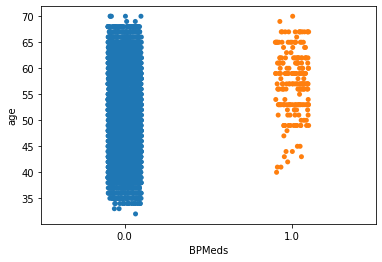

In [231]:
sns.stripplot(x='BPMeds', y='age', data=X_train_bal)

- Most of the people who take BPMeds are aged in the range of 50s to 70s and they have a chance of probably greater than 50%(from the histplot above).

#### Conclusions from the above analysis about the BPMeds feature:
    1. More than 50% chance of having TenYearCHD if a person is in BPMeds.
    2. Most of the senior citizens are on BP medications.
##### BPMeds is a vital feature in predicting TenYearCHD.

##### Strokes and TenYearCHD

- Approximately one fourth of patients with a recent stroke have a history of symptomatic coronary artery disease.
- These patients are prone to recurrent coronary heart disease (CHD) events with a 10-year risk >20%.
- Seems that *Stroke* plays a vital role in predicting future heart related problems, let's analyse it.
###### Referenced article: https://www.ahajournals.org/doi/10.1161/strokeaha.109.564781


In [232]:
X_train_bal.columns

Index(['index', 'male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<AxesSubplot:xlabel='prevalentStroke', ylabel='Count'>

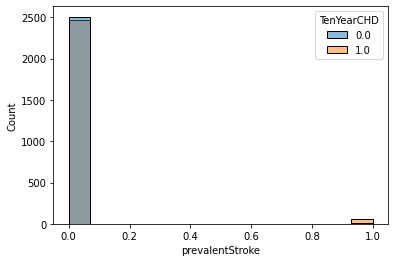

In [233]:
sns.histplot(x=X_train_bal['prevalentStroke'], hue=y_train)

- Again! Almost every person suffered from a stroke had a chance of more than 95%(approx) for TenYearCHD(the article was indicating towards this, and further justified by the dataset).
- Now let's examine the age variation of *prevalentStroke*.

<AxesSubplot:xlabel='prevalentStroke', ylabel='age'>

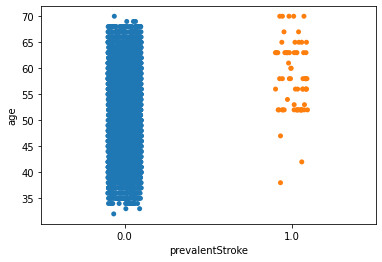

In [234]:
sns.stripplot(x='prevalentStroke', y='age', data=X_train_bal)

- If a person suffers from a stroke there is a higher chance that he/she is a senior citizen.

#### Conclusions from the above analysis about the prevalentStroke feature:
    1. More than 95%(approx) chance of having TenYearCHD if a person has suffered a stroke before.
    2. Most of the senior citizens(in the age of 50 to 70s) have suffered a stroke.
##### prevalentStroke is a vital feature in predicting TenYearCHD.

##### Hypertensive

High blood pressure, also called hypertension, is blood pressure that is higher than normal. Your blood pressure changes throughout the day based on your activities. Having blood pressure measures consistently above normal may result in a diagnosis of high blood pressure (or hypertension).

<AxesSubplot:xlabel='prevalentHyp', ylabel='Count'>

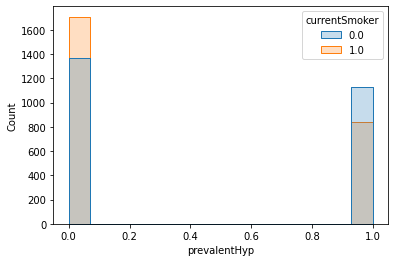

In [235]:
sns.histplot(x=X_train_bal['prevalentHyp'], hue=X_train_bal['currentSmoker'], element='step')

- A person having had a hypertension has a higher chance of being a non smoker than a current smoker.
#### But why now are they not having hypertension even when they are smoking?
    Well, we can say that they have cured their hypertension recently by being on BPMeds and now they neither have hypertension nor are on BPMeds.
- Also it's been found that smoking is one of the cause for hypertension which is also clearly depicted by the above plot.
- If the person was hypertensive earlier, then he/she must not be on BPMeds because now they are not hypertensive, they were in the past. Let's see.

<AxesSubplot:xlabel='prevalentHyp', ylabel='Count'>

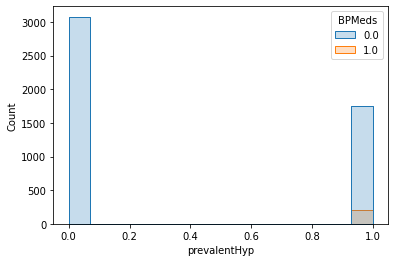

In [236]:
sns.histplot(x=X_train_bal['prevalentHyp'], hue=X_train_bal['BPMeds'], element='step')

- All of them who were hypertensive are on BPMeds.
- Let's see what is the chance of such a person having a TenYearCHD.

<AxesSubplot:xlabel='prevalentHyp', ylabel='Count'>

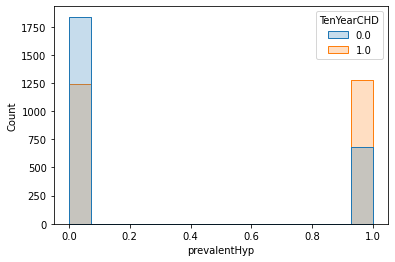

In [237]:
sns.histplot(x=X_train_bal['prevalentHyp'], hue=y_train, element='step')

- They clearly have a high chance of having the disease, if they suffer from hypertension.
##### How does age vary with this hypertensiveness?

<AxesSubplot:xlabel='prevalentHyp', ylabel='age'>

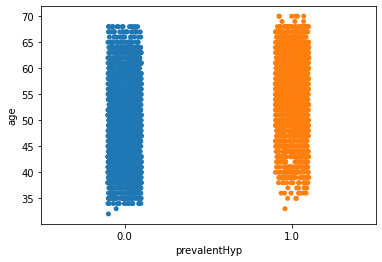

In [238]:
sns.stripplot(x='prevalentHyp', y='age', data=X_train_bal)

- Almost every person suffers from hypertension irrespective of their age, if their age in above 35.

#### Diabetes

- Let's see the effect of Diabeties on TenYearCHD

<AxesSubplot:xlabel='diabetes', ylabel='Count'>

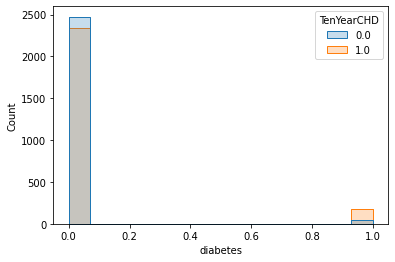

In [239]:
sns.histplot(x=X_train_bal['diabetes'], hue=y_train, element='step')

In [240]:
index_chd_diabetes = list(X_train_bal[X_train_bal['diabetes']==1].index.values)
index_chd_NOdiabetes = list(X_train_bal[X_train_bal['diabetes']==0].index.values)
count_chd_diabetes = 0
count_chd_NOdiabetes = 0
for i in index_chd_diabetes:
    if y_train[i]==1:
        count_chd_diabetes += 1

for i in index_chd_NOdiabetes:
    if y_train[i]==1:
        count_chd_NOdiabetes += 1
print('chance of a person having TenYearCHD if he/she has diabetes: ', count_chd_diabetes/len(index_chd_diabetes))
print('chance of a person having TenYearCHD if he/she has NO diabetes: ', count_chd_NOdiabetes/len(index_chd_NOdiabetes))

chance of a person having TenYearCHD if he/she has diabetes:  0.7955555555555556
chance of a person having TenYearCHD if he/she has NO diabetes:  0.4861889927310488


- There is a chance of more than 80% to be a TenYearCHD patient if the person is a dibetic patient.
- what is the effect of diabetes with age? Let's find out.

<AxesSubplot:xlabel='diabetes', ylabel='age'>

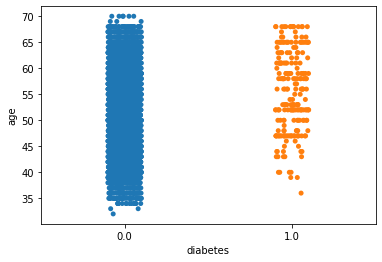

In [241]:
sns.stripplot(x='diabetes', y='age', data=X_train_bal)

- If the person is aged between 45 to 70, there is a greater chance of him/her having diabetes.
- Let's see the fraction of the patients having diabetes.

#### Total Cholestrol

<AxesSubplot:xlabel='age', ylabel='totChol'>

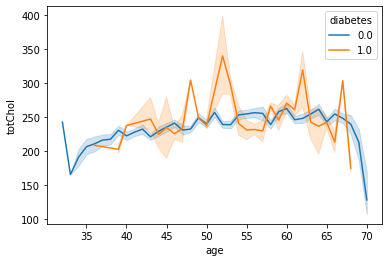

In [242]:
sns.lineplot(x=X_train_bal['age'], y=X_train_bal['totChol'], hue=X_train_bal['diabetes'])

- Those who have diabetes have really fluctuating cholestrol level(**total cholestrol**). High or Even low chelestrol level can lead to heart disease.
- Diabetes tends to lower "good" cholesterol levels and raise triglycerides and "bad" cholesterol levels, which increases the risk for heart disease and stroke.
- The above line explains the fluctuating levels of total cholestrol. In some cases "good" cholestrol << "bad" cholestrol and thus totChol is low, and in some cases "bad" cholestrol >> "good" cholestrol and thus totChol is high.
- What is the relation between cholestrol level and TenYearCHD? let's see.

<AxesSubplot:xlabel='age', ylabel='totChol'>

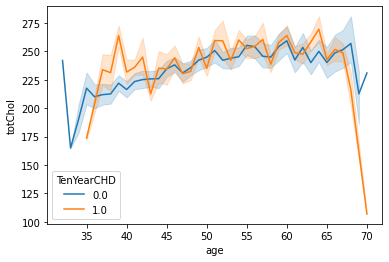

In [243]:
sns.lineplot(x=X_train_bal['age'], y=X_train_bal['totChol'], hue=y_train)

- Those who have heart disease have more fluctuating totChol level than those who don't have the same.
- Also if we consider those people who don't have the heart disease as **Normal** then *totChol* level of heart disease patient are either much high or much low than *Normal* ones.
- So, ***totChol*** plays a vital role in predicting heart disease.

#### Blood pressure

<AxesSubplot:xlabel='age', ylabel='sysBP'>

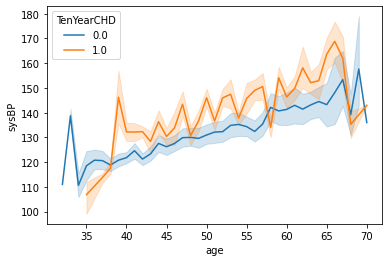

In [244]:
sns.lineplot(x=X_train_bal['age'], y=X_train_bal['sysBP'], hue=y_train)

- sysBP increases with age: which is natural.
- sysBP increases/decreases more rapidly for heart patients with age.
- Also, the fluctuation of sysBP increases with age of a heart patient.

<AxesSubplot:xlabel='age', ylabel='diaBP'>

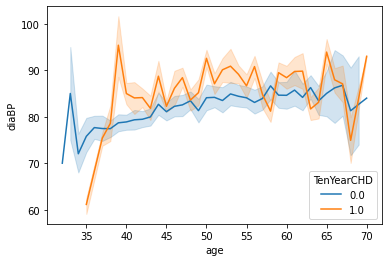

In [245]:
sns.lineplot(x=X_train_bal['age'], y=X_train_bal['diaBP'], hue=y_train)

- diaBP fluctuates more rapidly for heart patients with age.
- Hence, sysBP and diaBP play important role for prediction of TenYearCHD.

#### BMI

<AxesSubplot:xlabel='sysBP', ylabel='BMI'>

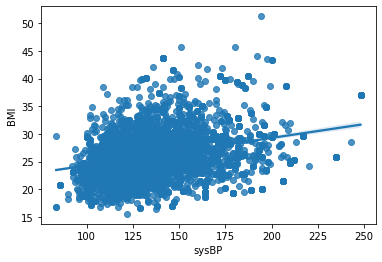

In [246]:
sns.regplot(x=X_train_bal['sysBP'], y=X_train_bal['BMI'])

We found a gradient of increasing blood pressure with higher levels of BMI. The fact that this gradient is present even in the fully adjusted analyses suggests that BMI may cause a direct effect on blood pressure, independent of other clinical risk factors.
###### Reference link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6316192/

And the above plot justifies the above statement with the dataset.
Increase in **sysBP** is directly associated with *TenYearCHD*, so *BMI* also is associated with *TenYearCHD*.
Thus, **BMI** is an important feature for this dataset. It is also much correlated to sysBP may be this correlation might lead us to dropping it as well!

#### Heart rate

<AxesSubplot:xlabel='age', ylabel='heartRate'>

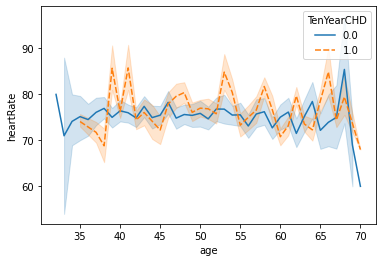

In [247]:
sns.lineplot(x=X_train_bal['age'], y=X_train_bal['heartRate'], hue=y_train, style=y_train)

- Normal patient: Not having TenYearCHD.
- The heartRate is either very low or very high from the normal level(wrt Normal patient) at a given age.
- Also, we can say that irrespective of the person having TenYearCHD, with age their heart rate fluctuates a lot. This is can be an important observation, as it can also be related to sysBP or diaBP.
- So we may have to drop this feature.

#### Glucose

<AxesSubplot:xlabel='age', ylabel='glucose'>

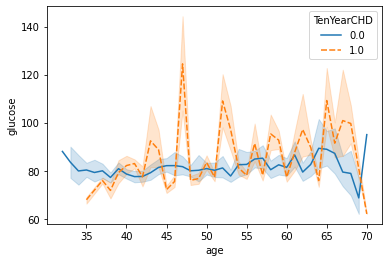

In [248]:
sns.lineplot(x=X_train_bal['age'], y=X_train_bal['glucose'], hue=y_train, style=y_train)

- for normal patients the glucose level is usually below 100.
- Glucose level fluctuates a lot when a person has TenYearCHD with age.
- So, for a person having heart disease, their glucose level is either very high or very low.
- this can be helpful for in model evaluation.

## Data preprocessing

In [249]:
X_train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            5040 non-null   int64  
 1   male             5040 non-null   float64
 2   age              5040 non-null   float64
 3   currentSmoker    5040 non-null   float64
 4   cigsPerDay       5040 non-null   float64
 5   BPMeds           5040 non-null   float64
 6   prevalentStroke  5040 non-null   float64
 7   prevalentHyp     5040 non-null   float64
 8   diabetes         5040 non-null   float64
 9   totChol          5040 non-null   float64
 10  sysBP            5040 non-null   float64
 11  diaBP            5040 non-null   float64
 12  BMI              5040 non-null   float64
 13  heartRate        5040 non-null   float64
 14  glucose          5040 non-null   float64
 15  TenYearCHD       5040 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 630.1 KB


In [250]:
X_train_bal.head()

,index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,2704,1.0,65.0,0.0,1.609438,0.0,0.0,1.0,1.0,240.0,235.0,100.0,25.817722,68.0,297.000000,1.0
1,158,1.0,38.0,0.0,1.609438,0.0,0.0,0.0,0.0,244.0,118.5,88.0,28.680000,77.0,65.000000,1.0
2,2265,0.0,60.0,0.0,1.609438,0.0,0.0,0.0,0.0,328.0,127.0,70.0,22.360000,75.0,63.000000,1.0
3,1658,1.0,56.0,1.0,3.218876,0.0,0.0,0.0,0.0,340.0,134.0,89.5,21.910000,50.0,72.000000,1.0
4,1527,1.0,44.0,1.0,2.995732,0.0,0.0,1.0,0.0,232.0,141.0,104.0,27.380000,75.0,82.119674,1.0


In [251]:
for col in X_train.columns:
    print(X_train[col].value_counts())

0.0    1675
1.0    1291
Name: male, dtype: int64
48.0    134
42.0    130
46.0    129
40.0    128
39.0    122
43.0    121
45.0    119
41.0    117
44.0    113
55.0    103
52.0    100
38.0     99
50.0     97
47.0     96
54.0     95
51.0     94
53.0     89
49.0     89
56.0     87
58.0     86
59.0     86
57.0     86
61.0     83
60.0     78
63.0     77
64.0     67
37.0     63
62.0     60
36.0     55
65.0     44
35.0     32
66.0     26
67.0     25
34.0     15
68.0     13
69.0      3
70.0      2
33.0      2
32.0      1
Name: age, dtype: int64
1.0    1484
0.0    1482
Name: currentSmoker, dtype: int64
0.000000     1482
20.000000     503
15.000000     152
30.000000     147
10.000000     104
9.000000      103
5.000000       86
3.000000       71
40.000000      57
1.000000       50
43.000000      40
25.000000      39
9.071088       26
35.000000      15
60.000000      10
2.000000       10
6.000000       10
4.000000        9
7.000000        8
8.000000        7
17.000000       6
23.000000       5
50.00

- Observing the above values it's clear that none of them need preprocessing, or they are ready to be fed into the model for further evaluation.

## Feature engineering

1. **Feature selection**
- We have two types of features in the dataset:
    - Continuous: using ANOVA test
    - Categorical: using Chi-squared test
- using the test described above for the types of features shown, we can select important features from the dataset therby improving our model.
- Let's extract our features in *Continuous* and *Categorical* types.

In [252]:
continuous_feat = X_train_bal[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
nominal_feat = X_train_bal[['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]

- Using *ANOVA* test to select continuous features.

In [253]:
best_continuous_feat = SelectKBest(f_classif, k=5)
fit_cont = best_continuous_feat.fit(continuous_feat, y_train)
f_scores_cont = pd.DataFrame(fit_cont.scores_)
f_cols_cont = pd.DataFrame(continuous_feat.columns)
features_scores_cont = pd.concat([f_cols_cont, f_scores_cont], axis=1)
features_scores_cont.columns = ['feature', 'score']
features_scores_cont

,feature,score
0,age,554.779307
1,cigsPerDay,21.509526
2,totChol,81.809921
3,sysBP,446.099892
4,diaBP,172.110846
5,BMI,67.663251
6,heartRate,14.862183
7,glucose,71.804864


- from the EDA done above we've have also predicted that *currentSmoker* is NOT an important feature, and we see the same result here as well.
- Same goes for *heartRate* feature as well.
- So, dropping these features can help us build an effective model.

In [254]:
drop_feature = list(features_scores_cont[features_scores_cont['score']<50]['feature'])

In [255]:
drop_feature

['cigsPerDay', 'heartRate']

- Using *chi2* test for selecting nominal features.

In [256]:
best_nominal_feat = SelectKBest(chi2, k=5)
fit = best_nominal_feat.fit(nominal_feat, y_train)
f_scores_nom = pd.DataFrame(fit.scores_)
f_cols_nom = pd.DataFrame(nominal_feat.columns)
features_scores_nom = pd.concat([f_cols_nom, f_scores_nom], axis=1)
features_scores_nom.columns = ['feature', 'score']
features_scores_nom

,feature,score
0,male,32.117622
1,currentSmoker,0.904949
2,BPMeds,49.542857
3,prevalentStroke,29.347826
4,prevalentHyp,183.486239
5,diabetes,78.617778


In [121]:
features_scores_nom.iloc[5]['score']

89.56302521008404

In [257]:
for i in range(len(features_scores_nom)):
    if features_scores_nom.iloc[i]['score']<30:
        drop_feature.append(features_scores_nom.iloc[i]['feature'])

In [258]:
drop_feature

['cigsPerDay', 'heartRate', 'currentSmoker', 'prevalentStroke']

- drop the **drop_feature**.

In [259]:
X_train_best_f = X_train_bal.drop(drop_feature, axis=1)
X_train_best_f.set_index('index', inplace=True)
X_train_best_f.head()

,male,age,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
index,,,,,,,,,,,
2704,1.0,65.0,0.0,1.0,1.0,240.0,235.0,100.0,25.817722,297.000000,1.0
158,1.0,38.0,0.0,0.0,0.0,244.0,118.5,88.0,28.680000,65.000000,1.0
2265,0.0,60.0,0.0,0.0,0.0,328.0,127.0,70.0,22.360000,63.000000,1.0
1658,1.0,56.0,0.0,0.0,0.0,340.0,134.0,89.5,21.910000,72.000000,1.0
1527,1.0,44.0,0.0,1.0,0.0,232.0,141.0,104.0,27.380000,82.119674,1.0


In [260]:
X_train_best_f.shape

(5040, 11)

2. **Handle imbalanced dataset**
- Handling imbalanced dataset

In [261]:
y_train.value_counts()

1.0    2520
0.0    2520
Name: TenYearCHD, dtype: int64

- so, the dataset is balanced.

3. **Handle the out liers**
    - let's analyse the density distribution of each continuous feature in the dataset.

In [262]:
X_train_best_f.columns

Index(['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'glucose', 'TenYearCHD'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='Density'>

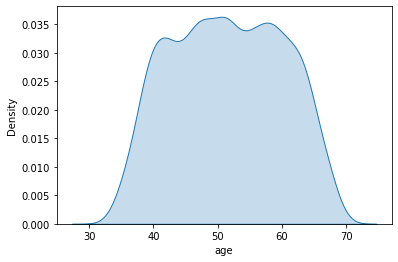

In [263]:
sns.kdeplot(data=X_train_best_f['age'], shade=True)

*age* feature is almost normally distributed.

<AxesSubplot:xlabel='totChol', ylabel='Density'>

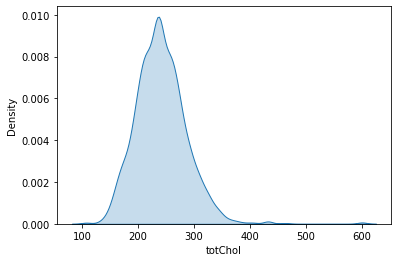

In [264]:
sns.kdeplot(data=X_train_best_f['totChol'], shade=True)

<AxesSubplot:xlabel='sysBP', ylabel='Density'>

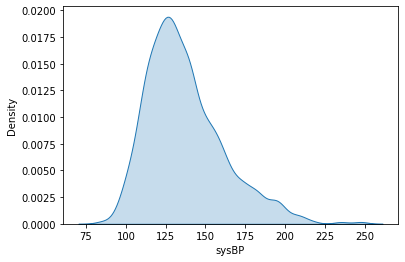

In [265]:
sns.kdeplot(data=X_train_best_f['sysBP'], shade=True)

<AxesSubplot:xlabel='sysBP', ylabel='Density'>

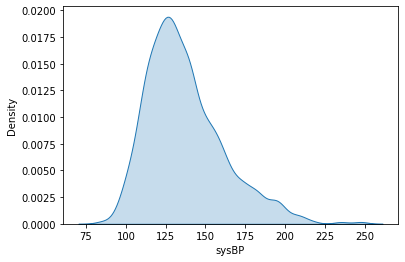

In [266]:
sns.kdeplot(data=X_train_best_f['sysBP'], shade=True)

- Now the plot is more normally distributed.

<AxesSubplot:xlabel='diaBP', ylabel='Density'>

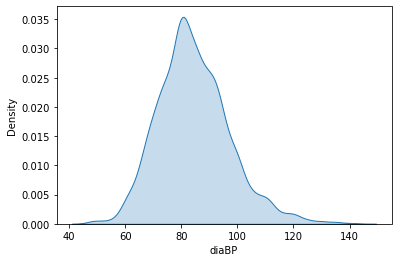

In [267]:
sns.kdeplot(data=X_train_best_f['diaBP'], shade=True)

<AxesSubplot:xlabel='glucose', ylabel='Density'>

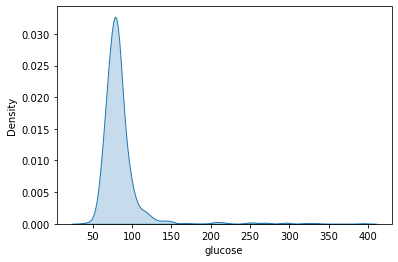

In [268]:
sns.kdeplot(data=X_train_best_f['glucose'], shade=True)

- There are hardly any outliers in the set of features.
- Now, drop the same features for X_test as well, so that we are able to test our model.

In [272]:
X_test.drop(drop_feature, axis=1, inplace=True)
X_test.head()

,male,age,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,0.0,47.0,0.0,1.0,0.0,305.0,128.0,92.5,27.64,62.0
1,0.0,58.0,0.0,1.0,0.0,195.0,153.0,80.5,23.36,73.0
2,0.0,61.0,0.0,1.0,0.0,326.0,200.0,104.0,38.46,78.0
3,0.0,45.0,0.0,1.0,0.0,215.0,152.5,82.0,25.92,75.0
4,0.0,57.0,0.0,0.0,0.0,287.0,136.0,92.0,26.24,71.0


- Drop the target variables from both X_train_best_f and X_test:

In [274]:
X_train_best_f.drop('TenYearCHD', axis=1, inplace=True)
X_test.drop('TenYearCHD', axis=1, inplace=True)

4. **Feature scaling**
    - Scaling the features using *Standard Scaler*

In [275]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_best_f))
X_train_scaled.columns = X_train_best_f.columns
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.columns = X_test.columns

In [276]:
X_train_scaled.head()

,male,age,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,1.053408,1.573290,-0.208514,1.25252,4.626013,-0.024292,4.000759,1.214817,-0.077993,6.956850
1,1.053408,-1.567474,-0.208514,-0.79839,-0.216169,0.062773,-0.757196,0.283021,0.603338,-0.642421
2,-0.949299,0.991667,-0.208514,-0.79839,-0.216169,1.891139,-0.410049,-1.114673,-0.901064,-0.707932
3,1.053408,0.526369,-0.208514,-0.79839,-0.216169,2.152334,-0.124163,0.399495,-1.008181,-0.413133
4,1.053408,-0.869526,-0.208514,1.25252,-0.216169,-0.198422,0.161722,1.525415,0.293888,-0.081658


In [277]:
X_test_scaled.head()

,male,age,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,-0.949299,-0.520552,-0.208514,1.25252,-0.216169,1.390515,-0.369208,0.632444,0.355778,-0.740687
1,-0.949299,0.759018,-0.208514,1.25252,-0.216169,-1.003774,0.651812,-0.299352,-0.663025,-0.380377
2,-0.949299,1.107992,-0.208514,1.25252,-0.216169,1.847606,2.571331,1.525415,2.931353,-0.216600
3,-0.949299,-0.753202,-0.208514,1.25252,-0.216169,-0.568449,0.631392,-0.182877,-0.053647,-0.314866
4,-0.949299,0.642693,-0.208514,-0.79839,-0.216169,0.998722,-0.042482,0.593619,0.022525,-0.445888


## Model building and Evaluation

In [278]:
y_train.shape

(5040,)

In [279]:
model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)


In [280]:
X_test_scaled.head()

,male,age,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,-0.949299,-0.520552,-0.208514,1.25252,-0.216169,1.390515,-0.369208,0.632444,0.355778,-0.740687
1,-0.949299,0.759018,-0.208514,1.25252,-0.216169,-1.003774,0.651812,-0.299352,-0.663025,-0.380377
2,-0.949299,1.107992,-0.208514,1.25252,-0.216169,1.847606,2.571331,1.525415,2.931353,-0.216600
3,-0.949299,-0.753202,-0.208514,1.25252,-0.216169,-0.568449,0.631392,-0.182877,-0.053647,-0.314866
4,-0.949299,0.642693,-0.208514,-0.79839,-0.216169,0.998722,-0.042482,0.593619,0.022525,-0.445888


In [282]:
print('r2_score_train: %.5f, r2_score_test: %5f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

r2_score_train: -0.30794, r2_score_test: -1.416568


- Plot confusion matrix

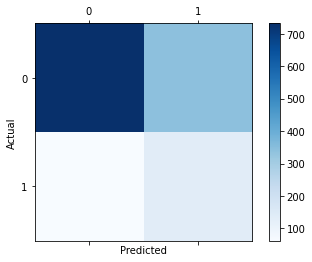

array([[732, 342],
       [ 62, 136]], dtype=int64)

In [297]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
conf_mat

In [306]:
print('TP:', conf_mat[1][1], '\nFP:', conf_mat[0][1], '\nTN:', conf_mat[0][0], '\nFN:', conf_mat[1][0], end='\n')
TP = conf_mat[1][1]
FP = conf_mat[0][1]
TN = conf_mat[0][0]
FN = conf_mat[1][0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*precision*recall/(precision+recall)
print('precision: ', precision, '\nrecall: ', recall)
print('F1_score: ', f1_score)

TP: 136 
FP: 342 
TN: 732 
FN: 62
precision:  0.28451882845188287 
recall:  0.6868686868686869
F1_score:  0.40236686390532544


- Here false neagtive is 62; i.e we have predicted 62 people NOT having TenYearCHD but they actually have it. This is serious prblem, so we can't cling to F1_score, accuracy is preffered here.
- In this dataset we have a distribution of 85% of class 0 and 15% of class 1. So a dummy model that predicts every case as 0 will have 85% accuracy.
More than that, since this is a health related problem, our false negatives are way more important than our false positives since a false negative can cost someones life.

In [292]:
accuracy_score(y_test, y_test_pred)

0.6823899371069182

# Model's Accuracy: 68.2%